# QC report
This R notebook takes as an input a list of sample names with corresponding quality metrics files (output of Picard tools) locations. Then it reads in quality metrics files and plots boxplots for four parameters:
1. TOTAL_READS
2. AT_DROPOUT
3. GC_DROPOUT
4. HET_SNP_SENSITIVITY
The refence values (corresponding to a non-synthetic data) are indicated by a red line on each boxplot

In [186]:
install.packages("reticulate")
install.packages("gridExtra")

Installing package into ‘/home/jupyter-user/.rpackages’
(as ‘lib’ is unspecified)
Installing package into ‘/home/jupyter-user/.rpackages’
(as ‘lib’ is unspecified)


In [66]:
library(reticulate)

In [187]:
library(ggplot2)
library(gridExtra)

In [88]:
file_list <- cbind(c("sample1", "sample2", "sample3"), c("gs://fc-37671437-262f-4e1d-94e9-a3e26b265cb5/14eeb874-0e91-417e-bdce-8f9a45c4dabd/CollectQualityMetrics/c7323eb9-8bc8-40be-8c1f-29d506046f9e/call-CollectHsMetrics/exome-metrics.txt",
               "gs://fc-37671437-262f-4e1d-94e9-a3e26b265cb5/3d9be388-7083-4584-a35a-f2a43cff7aaf/CollectQualityMetrics/d688478a-3617-47f7-9cce-9a82b0243ad3/call-CollectHsMetrics/exome-metrics.txt",
               "gs://fc-37671437-262f-4e1d-94e9-a3e26b265cb5/3d9be388-7083-4584-a35a-f2a43cff7aaf/CollectQualityMetrics/2ba36008-14e6-4ea5-b5e6-5f0143d7acc4/call-CollectHsMetrics/exome-metrics.txt"))
rownames(file_list) <- file_list[,1]
file_list[,-1] 

sample1 
"gs://fc-37671437-262f-4e1d-94e9-a3e26b265cb5/14eeb874-0e91-417e-bdce-8f9a45c4dabd/CollectQualityMetrics/c7323eb9-8bc8-40be-8c1f-29d506046f9e/call-CollectHsMetrics/exome-metrics.txt" 
                                                                                                                                                                               sample2 
"gs://fc-37671437-262f-4e1d-94e9-a3e26b265cb5/3d9be388-7083-4584-a35a-f2a43cff7aaf/CollectQualityMetrics/d688478a-3617-47f7-9cce-9a82b0243ad3/call-CollectHsMetrics/exome-metrics.txt" 
                                                                                                                                                                               sample3 
"gs://fc-37671437-262f-4e1d-94e9-a3e26b265cb5/3d9be388-7083-4584-a35a-f2a43cff7aaf/CollectQualityMetrics/2ba36008-14e6-4ea5-b5e6-5f0143d7acc4/call-CollectHsMetrics/exome-metrics.txt"

In [115]:
original_metrics_class <- read.csv(pipe('gsutil cat gs://fc-37671437-262f-4e1d-94e9-a3e26b265cb5/14eeb874-0e91-417e-bdce-8f9a45c4dabd/CollectQualityMetrics/c7323eb9-8bc8-40be-8c1f-29d506046f9e/call-CollectHsMetrics/exome-metrics.txt'), skip=6, sep="\t", nrows=2)
head(original_metrics_class[1,])

BAIT_SET,GENOME_SIZE,BAIT_TERRITORY,TARGET_TERRITORY,BAIT_DESIGN_EFFICIENCY,TOTAL_READS,PF_READS,PF_UNIQUE_READS,PCT_PF_READS,PCT_PF_UQ_READS,⋯,HS_PENALTY_40X,HS_PENALTY_50X,HS_PENALTY_100X,AT_DROPOUT,GC_DROPOUT,HET_SNP_SENSITIVITY,HET_SNP_Q,SAMPLE,LIBRARY,READ_GROUP
Broad,3101976562,32950014,32950014,1,15697970,15697970,15697970,1,1,⋯,0,0,0,0.69954,0.923335,0.993604,22,HG00096,,NA


In [194]:
synthetic_metrics_class <- sapply(file_list[,2], function(x){
    x2 <- paste0("gsutil cat ", x)
    res <- read.csv(pipe(x2), , skip=6, sep="\t", nrows=2)[1,]
    #res <- cbind(c(names(x), names(x)), res)
    #colnames(res)[1] <- "sample"
    #print(res)
    res
    
})
head(synthetic_metrics_class)


,sample1,sample2,sample3
BAIT_SET,1,1,1
GENOME_SIZE,3101976562,3101976562,3101976562
BAIT_TERRITORY,32950014,32950014,32950014
TARGET_TERRITORY,32950014,32950014,32950014
BAIT_DESIGN_EFFICIENCY,1,1,1
TOTAL_READS,15697970,15698061,15697595


In [195]:
summary_smc <- apply(synthetic_metrics_class, 1, function(x){
    x <- unlist(x)
    x <- as.numeric(as.character(x))
    res <- c(min(x), mean(x), max(x), sd(x))
    names(res) <- c("min", "mean", "max", "sd")
    res
})

head(summary_smc)



Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”

,BAIT_SET,GENOME_SIZE,BAIT_TERRITORY,TARGET_TERRITORY,BAIT_DESIGN_EFFICIENCY,TOTAL_READS,PF_READS,PF_UNIQUE_READS,PCT_PF_READS,PCT_PF_UQ_READS,⋯,HS_PENALTY_40X,HS_PENALTY_50X,HS_PENALTY_100X,AT_DROPOUT,GC_DROPOUT,HET_SNP_SENSITIVITY,HET_SNP_Q,SAMPLE,LIBRARY,READ_GROUP
min,NA,3101976562,32950014,32950014,1,1.569760e+07,1.569760e+07,1.569760e+07,1,1,⋯,0,0,0,0.686491000,0.89540100,9.936040e-01,22,NA,NA,NA
mean,NA,3101976562,32950014,32950014,1,1.569788e+07,1.569788e+07,1.569788e+07,1,1,⋯,0,0,0,0.695375000,0.91005133,9.936473e-01,22,NA,NA,NA
max,NA,3101976562,32950014,32950014,1,1.569806e+07,1.569806e+07,1.569806e+07,1,1,⋯,0,0,0,0.700094000,0.92333500,9.936730e-01,22,NA,NA,NA
sd,NA,0,0,0,0,2.470027e+02,2.470027e+02,2.470027e+02,0,0,⋯,0,0,0,0.007698755,0.01401706,3.774034e-05,0,NA,NA,NA


In [124]:
comparison <- cbind(t(original_metrics_class[1,]), t(summary_smc))
colnames(comparison)[1] <- "original sample"
comparison2 <- na.omit(comparison)
head(comparison2)

,original sample,min,mean,max,sd
GENOME_SIZE,3101976562,3101976562,3101976562,3101976562,0
BAIT_TERRITORY,32950014,32950014,32950014,32950014,0
TARGET_TERRITORY,32950014,32950014,32950014,32950014,0
BAIT_DESIGN_EFFICIENCY,1,1,1,1,0
TOTAL_READS,15697970,15697595,15697875.3333333,15698061,247.002699040584
PF_READS,15697970,15697595,15697875.3333333,15698061,247.002699040584


In [169]:
synthetic_metrics_class2 <- cbind(t(original_metrics_class[1,]), synthetic_metrics_class)
colnames(synthetic_metrics_class2)[1] <- "original_sample"

df <- data.frame(t(synthetic_metrics_class2))
df <- cbind(rownames(df), df)
colnames(df)[1] <- "sample"
df$group <- as.factor(rep("group", nrow(df)))
#df2 <- gather(df, )
head(df,10)

parameters_to_plot <- c("TOTAL_READS", "AT_DROPOUT", "GC_DROPOUT", "HET_SNP_SENSITIVITY")



,sample,BAIT_SET,GENOME_SIZE,BAIT_TERRITORY,TARGET_TERRITORY,BAIT_DESIGN_EFFICIENCY,TOTAL_READS,PF_READS,PF_UNIQUE_READS,PCT_PF_READS,⋯,HS_PENALTY_50X,HS_PENALTY_100X,AT_DROPOUT,GC_DROPOUT,HET_SNP_SENSITIVITY,HET_SNP_Q,SAMPLE,LIBRARY,READ_GROUP,group
original_sample,original_sample,Broad,3101976562,32950014,32950014,1,15697970,15697970,15697970,1,⋯,0,0,0.69954,0.923335,0.993604,22,HG00096,,NA,group
sample1,sample1,1,3101976562,32950014,32950014,1,15697970,15697970,15697970,1,⋯,0,0,0.69954,0.923335,0.993604,22,1,1,NA,group
sample2,sample2,1,3101976562,32950014,32950014,1,15698061,15698061,15698061,1,⋯,0,0,0.686491,0.895401,0.993673,22,1,1,NA,group
sample3,sample3,1,3101976562,32950014,32950014,1,15697595,15697595,15697595,1,⋯,0,0,0.700094,0.911418,0.993665,22,1,1,NA,group


In [177]:
x <- "TOTAL_READS"
as.numeric(as.characterunlist(df[x]))


[1] 15697970 15697970 15698061 15697595

In [192]:

plots_list <- lapply(parameters_to_plot, function(x){
   df <- df[,c(x, "group")] 
   df$x <- as.numeric(as.character(unlist(df[x])))
    p <- ggplot(df[-1,], aes(x=group,y=x)) 
    p2 <- p + geom_boxplot() + geom_hline(yintercept=df$x[1], color = "red", size=2) + coord_flip() + ggtitle(x) + labs(x = NULL, y= NULL)
})
#df$TOTAL_READS <- as.numeric(df$TOTAL_READS)
#p <- ggplot(df[-1,], aes(x=group,y=TOTAL_READS)) 
#p + geom_boxplot() + geom_hline(yintercept=16000000, color = "red", size=2) + coord_flip() + ggtitle("TOTAL_READS")


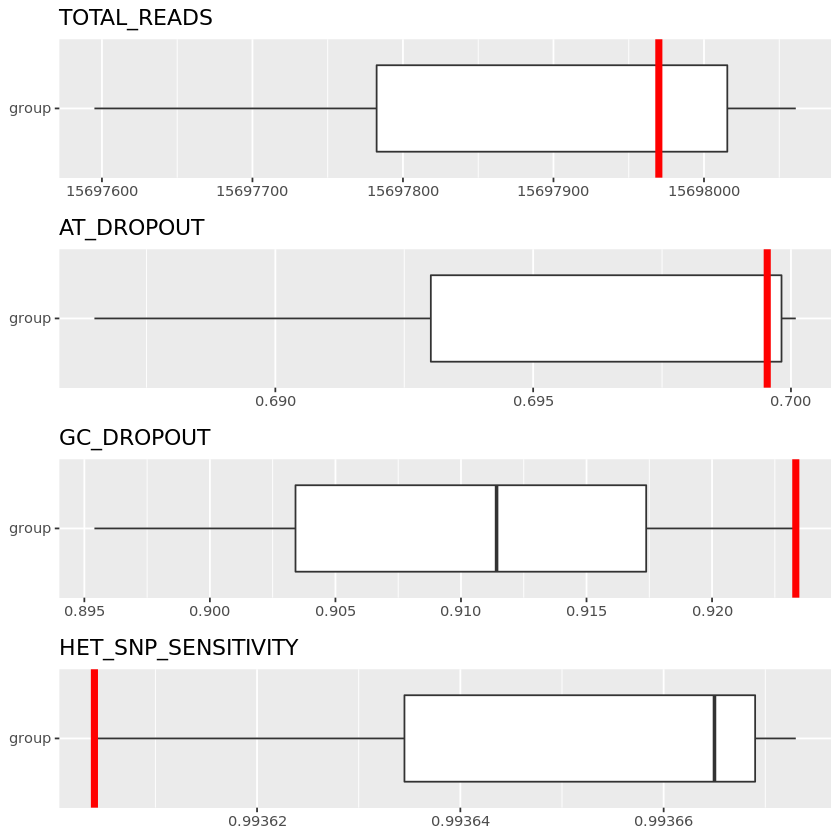

In [193]:
grid.arrange(plots_list[[1]], plots_list[[2]], plots_list[[3]], plots_list[[4]], ncol=1)

In [42]:
#metrics_class2 <- read.csv(pipe('gsutil cat gs://fc-37671437-262f-4e1d-94e9-a3e26b265cb5/3d9be388-7083-4584-a35a-f2a43cff7aaf/CollectQualityMetrics/d688478a-3617-47f7-9cce-9a82b0243ad3/call-CollectHsMetrics/exome-metrics.txt'), skip=6, sep="\t", nrows=2)

In [64]:
#two_files_metrics <- cbind(t(metrics_class1)[,1], t(metrics_class2)[,1])
#colnames(two_files_metrics) <- c("file1", "file2")


In [65]:
#head(two_files_metrics)

,file1,file2
BAIT_SET,Broad,Broad
GENOME_SIZE,3101976562,3101976562
BAIT_TERRITORY,32950014,32950014
TARGET_TERRITORY,32950014,32950014
BAIT_DESIGN_EFFICIENCY,1,1
TOTAL_READS,15697970,15698061


,sample1,sample2,sample3
coverage_or_base_quality,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200"
high_quality_coverage_count,"104406, 21928, 40064, 68742, 116976, 196880, 312594, 478850, 694710, 956556, 1249680, 1554738, 1856304, 2141900, 2379052, 2576680, 2721216, 2806802, 2830868, 2808972, 2732738, 2619146, 2472710, 2312818, 2134524, 1960028, 1790566, 1637052, 1491230, 1363354, 1252540, 1154522, 1068586, 1004296, 946652, 896832, 861148, 832974, 809208, 790560, 774276, 761442, 746218, 730226, 707438, 682000, 654046, 614996, 573708, 528720, 481838, 434620, 382612, 334306, 284940, 242170, 200074, 164356, 132120, 104318, 81430, 62806, 47896, 36142, 26456, 19064, 13532, 9672, 6496, 4566, 3062, 1972, 1242, 702, 472, 298, 164, 78, 76, 30, 20, 10, 6, 8, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","103896, 20762, 38788, 70262, 119122, 194270, 313232, 476654, 689050, 948818, 1240480, 1540058, 1850790, 2138104, 2389008, 2591186, 2737296, 2821104, 2840728, 2808592, 2738618, 2623278, 2472552, 2312552, 2134896, 1963450, 1789806, 1630058, 1489052, 1

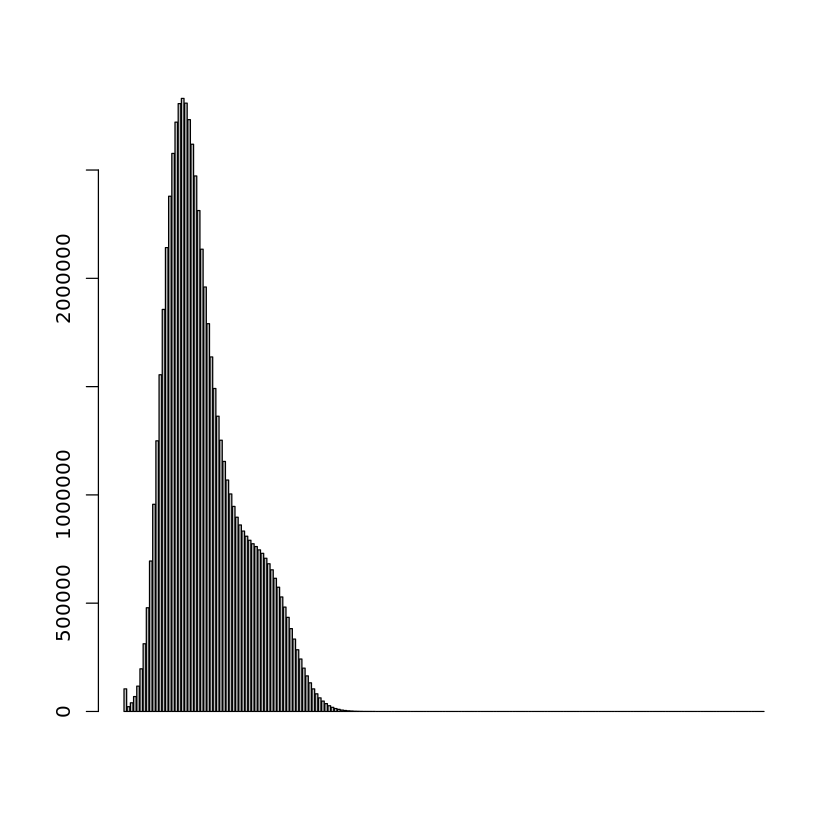

In [101]:
histogram <- read.csv(pipe('gsutil cat gs://fc-37671437-262f-4e1d-94e9-a3e26b265cb5/14eeb874-0e91-417e-bdce-8f9a45c4dabd/CollectQualityMetrics/c7323eb9-8bc8-40be-8c1f-29d506046f9e/call-CollectHsMetrics/exome-metrics.txt'), skip=11, sep="\t")
synthetic_histogram <- sapply(file_list[,2], function(x){
    x2 <- paste0("gsutil cat ", x)
    res <- read.csv(pipe(x2),  skip=11, sep="\t")
    #res <- cbind(c(names(x), names(x)), res)
    #colnames(res)[1] <- "sample"
    #print(res)
    res
    
})
head(synthetic_histogram)
barplot(unlist(synthetic_histogram[2,1]))

In [38]:
print(head(metrics_class2))

  BAIT_SET GENOME_SIZE BAIT_TERRITORY TARGET_TERRITORY BAIT_DESIGN_EFFICIENCY
1    Broad  3101976562       32950014         32950014                      1
2    Broad  3101976562       32950014         32950014                      1
  TOTAL_READS PF_READS PF_UNIQUE_READS PCT_PF_READS PCT_PF_UQ_READS
1    15698061 15698061        15698061            1               1
2    15698061 15698061        15698061            1               1
  PF_UQ_READS_ALIGNED PCT_PF_UQ_READS_ALIGNED PF_BASES_ALIGNED
1            15698057                       1       1585334052
2            15698057                       1       1585334052
  PF_UQ_BASES_ALIGNED ON_BAIT_BASES NEAR_BAIT_BASES OFF_BAIT_BASES
1          1585334052     869144714       715217527         971811
2          1585334052     869144714       715217527         971811
  ON_TARGET_BASES PCT_SELECTED_BASES PCT_OFF_BAIT ON_BAIT_VS_SELECTED
1       825535594           0.999387     0.000613            0.548577
2       825535594           0.99

In [32]:
print(head(histogram))
histogram <- data.frame(histogram)

  coverage_or_base_quality high_quality_coverage_count unfiltered_baseq_count
1                        0                      104406                      0
2                        1                       21928                      0
3                        2                       40064                      0
4                        3                       68742                3630034
5                        4                      116976                3735748
6                        5                      196880                3464440
  high_quality_coverage_count.1 unfiltered_baseq_count.1
1                        104406                        0
2                         21928                        0
3                         40064                        0
4                         68742                  3630034
5                        116976                  3735748
6                        196880                  3464440


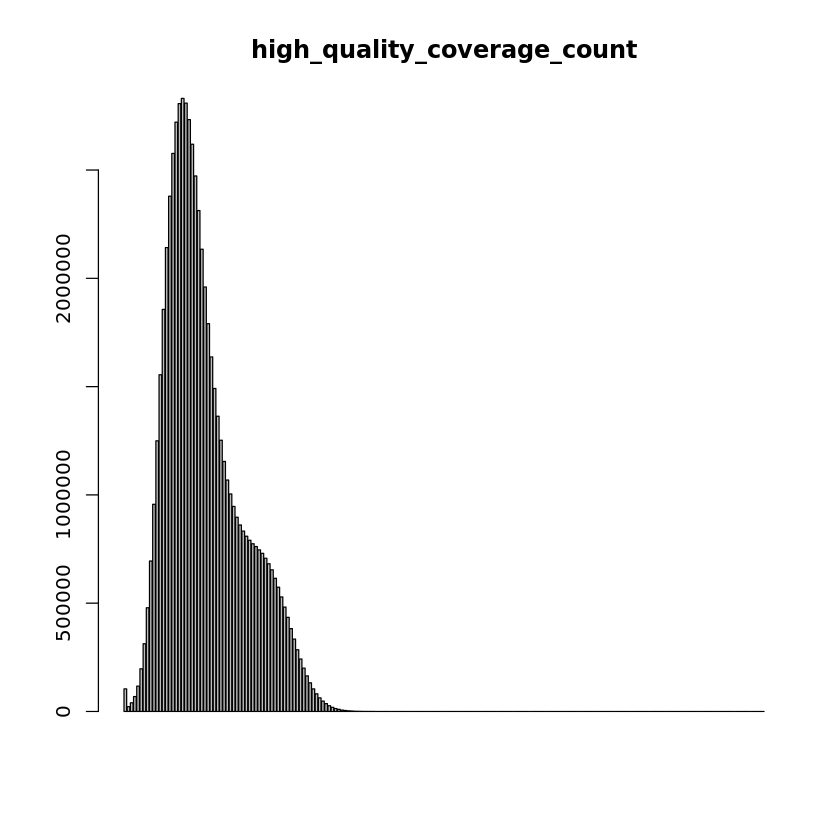

In [34]:
barplot(histogram$high_quality_coverage_count, main="high_quality_coverage_count")

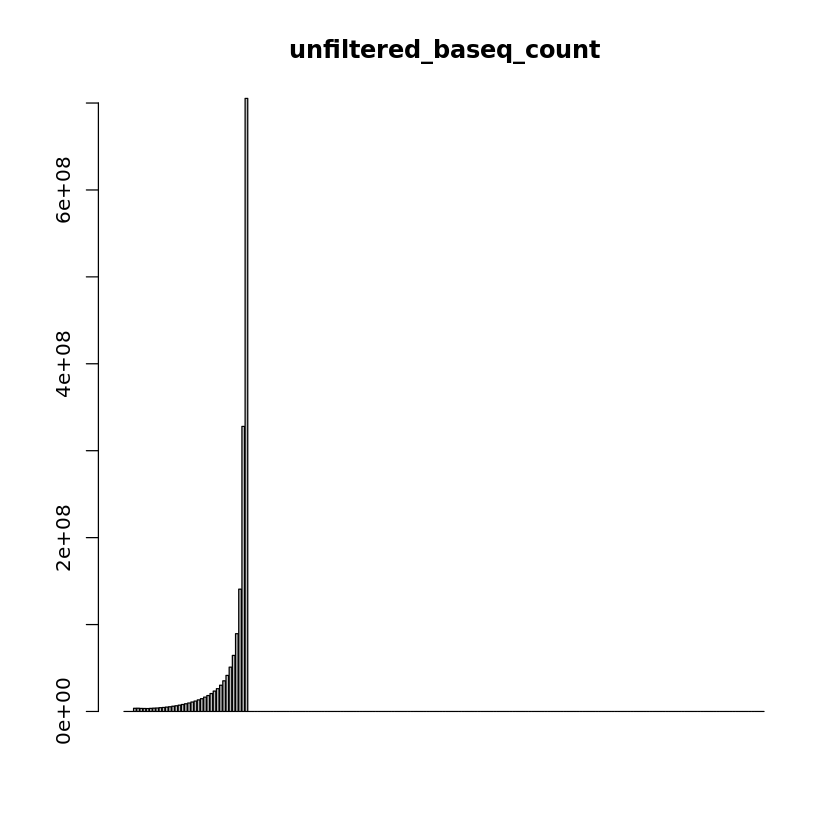

In [35]:
barplot(histogram$unfiltered_baseq_count, main="unfiltered_baseq_count")